In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage.filters import gaussian_filter


In [2]:
#photonImage = np.zeros((128, 128))
size = 64
p0=int(size/2)
lowerlim = int(size/3)
upperlim = int(2*size/3)
minBlur = 1
fovSize = 20
seed = 42
rs = np.random.RandomState(seed)


In [3]:
def getFilterSigma(fx,fy,xp0, yp0,minBlurParam,fovSizeParam):
    return (1/fovSize**2)*((fx-xp0)**2+(fy-yp0)**2)+minBlur

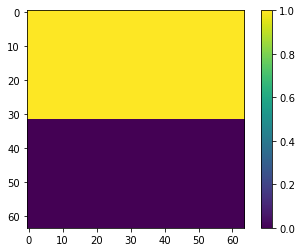

In [4]:
screen = np.zeros((size, size))
ones = np.ones((size, size))
screen[:int(len(screen)/2)] = ones[:int(len(screen)/2)]

plt.imshow(screen)
plt.colorbar()

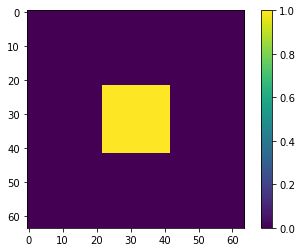

In [5]:
square = np.zeros((size,size))

for row in range(size):
    for col in range(size):
        pixel = square[row, col]
        if lowerlim < row < upperlim:
            if lowerlim < col < upperlim:
                #pixel += 1
                if lowerlim < row < upperlim:
                    pixel += 1
        
                square[row, col] += pixel

plt.imshow(square)
plt.colorbar()

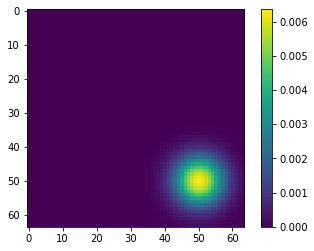

In [19]:
def gaussian(intensity, x0, y0, sigma):
    x_values = np.arange(0, size, 1)
    #y_values = np.arange(0, size, 1)
    X, Y = np.meshgrid(x_values, x_values)
    gaus_2d = ((intensity)/(2*np.pi*(sigma**2))*np.exp(-(((X-x0)**2)+(Y-y0)**2)/(2*sigma**2)))
    return gaus_2d

z = gaussian(1, 50, 50, 5)
plt.imshow(z)
plt.colorbar()


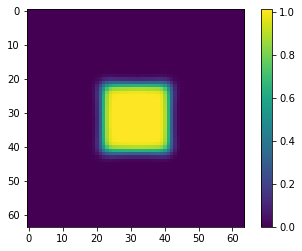

In [22]:
result = np.zeros((size,size))

for rowi, row in enumerate(square):
    for coli in range(0, len(row), 1):
    
        filterSigma = getFilterSigma(rowi, coli, p0, p0, minBlur, fovSize)
        #filterSigma = 20
        intensityDist = square[rowi, coli]
        result += gaussian(intensityDist, coli, rowi, filterSigma)
        #print(rowi, coli, intensityDist)
        
plt.imshow(result)
plt.colorbar()
